<a href="https://colab.research.google.com/github/Purity-asiko/Pree-Projects/blob/main/House_predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction with California Housing Dataset

In [5]:
import pandas as pd  # For handling data like a spreadsheet
import numpy as np   # For math operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.datasets import fetch_california_housing  # New dataset
from sklearn.model_selection import train_test_split  # To split data
from sklearn.linear_model import LinearRegression  # The model
from sklearn.metrics import mean_squared_error, r2_score  # To check how good our model is

In [6]:
california = fetch_california_housing()  # Load the dataset
data = pd.DataFrame(california.data, columns=california.feature_names)  # Make it a table
data['PRICE'] = california.target  # Add the prices column (in $100,000s)
print(data.head())  # Show the first 5 rows
print(data.describe())  # Show summary stats (like average, min, max)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563

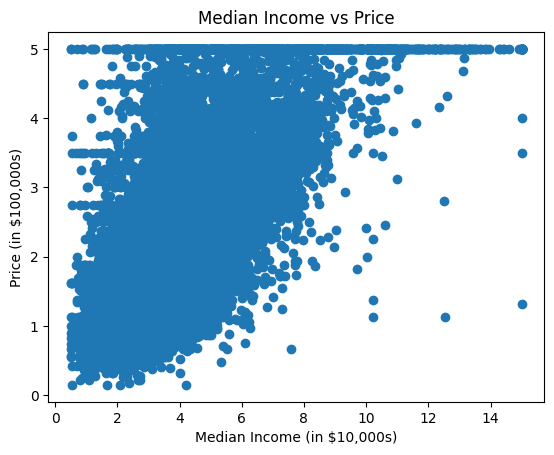

In [7]:
plt.scatter(data['MedInc'], data['PRICE'])  # Plot median income vs. price
plt.xlabel('Median Income (in $10,000s)')  # Label x-axis
plt.ylabel('Price (in $100,000s)')  # Label y-axis
plt.title('Median Income vs Price')  # Title
plt.show()  # Display the plot

In [9]:
X = data.drop('PRICE', axis=1)  # Features (everything except price)
y = data['PRICE']  # Target (price)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()  # Create the model
model.fit(X_train, y_train)  # Train it on the training data

LinearRegression()

In [11]:
y_pred = model.predict(X_test)  # Make predictions
mse = mean_squared_error(y_test, y_pred)  # Calculate error
r2 = r2_score(y_test, y_pred)  # Calculate accuracy
print(f'Mean Squared Error: {mse:.2f}')  # Lower is better
print(f'R2 Score: {r2:.2f}')  # Closer to 1 is better

Mean Squared Error: 0.56
R2 Score: 0.58


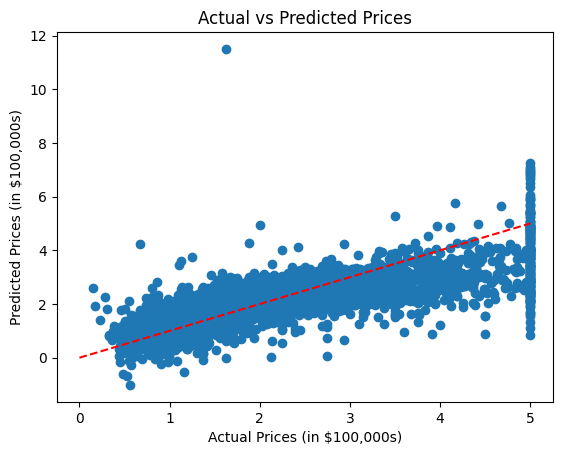

In [12]:
plt.scatter(y_test, y_pred)  # Plot actual vs. predicted
plt.xlabel('Actual Prices (in $100,000s)')  # Label x-axis
plt.ylabel('Predicted Prices (in $100,000s)')  # Label y-axis
plt.title('Actual vs Predicted Prices')  # Title
plt.plot([0, 5], [0, 5], 'r--')  # Diagonal line (perfect predictions)
plt.show()

# House Price Prediction
**Objective**: Predict house prices using the California Housing Dataset.
**Dataset**: Contains features like median income, house age, and prices (in $100,000s).
**Model**: Linear Regression
**Results**: Mean Squared Error = {mse:.2f}, R² Score = {r2:.2f}
**Insights**: The model performs well, especially with income as a key factor.
**Future Work**: Try feature scaling or a Random Forest model.